<a href="https://colab.research.google.com/github/anushukla1808/Bitcoin-Data-Analysis/blob/main/Bitcoin_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('btcusd_1-min_data.csv')

# Step 1: Convert Timestamp to Datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.rename(columns={'Timestamp': 'Datetime'}, inplace=True)

# Step 2: Check for Missing Values
missing_summary = data.isnull().sum()

# Step 3: Aggregate Data to Daily Level
data.set_index('Datetime', inplace=True)
daily_data = data.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Step 4: Save the Cleaned and Aggregated Data
from google.colab import drive
drive.mount('/content/drive')

daily_data.reset_index(inplace=True)
output_path = '/content/drive/My Drive/bitcoin_daily_data.csv'  # Update path to your desired location
daily_data.to_csv(output_path, index=False)

print(f"Cleaned and aggregated data saved to: {output_path}")

Mounted at /content/drive
Cleaned and aggregated data saved to: /content/drive/My Drive/bitcoin_daily_data.csv


In [3]:
# Step 5: Exploratory Data Analysis (EDA)
# Summary Statistics
summary_stats = daily_data.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
                  Datetime       Open      High        Low      Close  \
count                   82  82.000000  82.00000  82.000000  82.000000   
mean   2012-02-10 12:00:00   5.594756   5.80122   5.275976   5.599634   
min    2012-01-01 00:00:00   4.380000   4.38000   3.800000   4.380000   
25%    2012-01-21 06:00:00   4.980000   5.05250   4.792500   4.980000   
50%    2012-02-10 12:00:00   5.405000   5.67500   5.100000   5.405000   
75%    2012-03-01 18:00:00   6.285000   6.50000   5.937500   6.285000   
max    2012-03-22 00:00:00   7.150000   7.38000   6.950000   7.150000   
std                    NaN   0.813552   0.85713   0.718450   0.808577   

            Volume  
count    82.000000  
mean    167.311497  
min       0.000000  
25%      51.342170  
50%     106.362691  
75%     247.145286  
max    1144.739373  
std     185.439406  


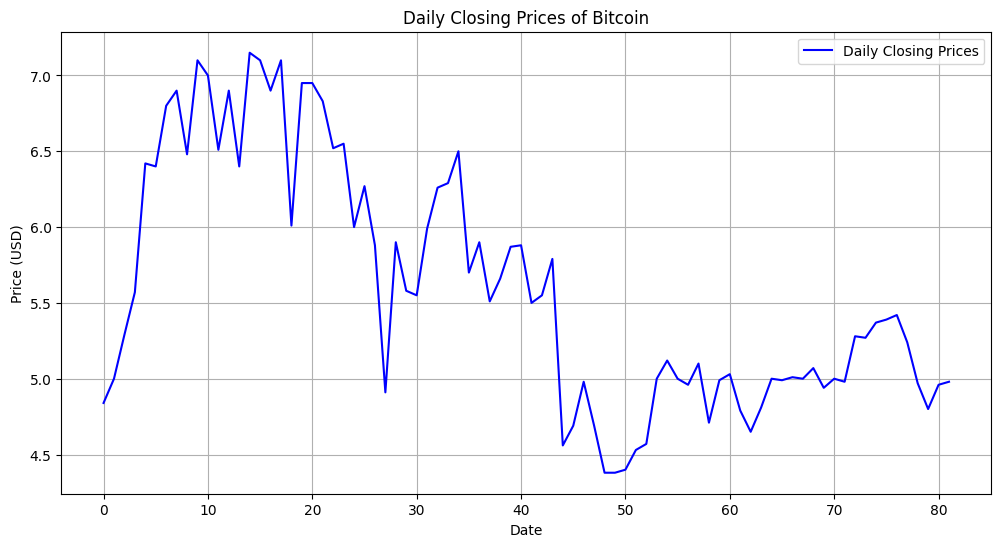

In [4]:
import matplotlib.pyplot as plt

# Trend Analysis - Plotting Daily Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Close'], label='Daily Closing Prices', color='blue')
plt.title('Daily Closing Prices of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()



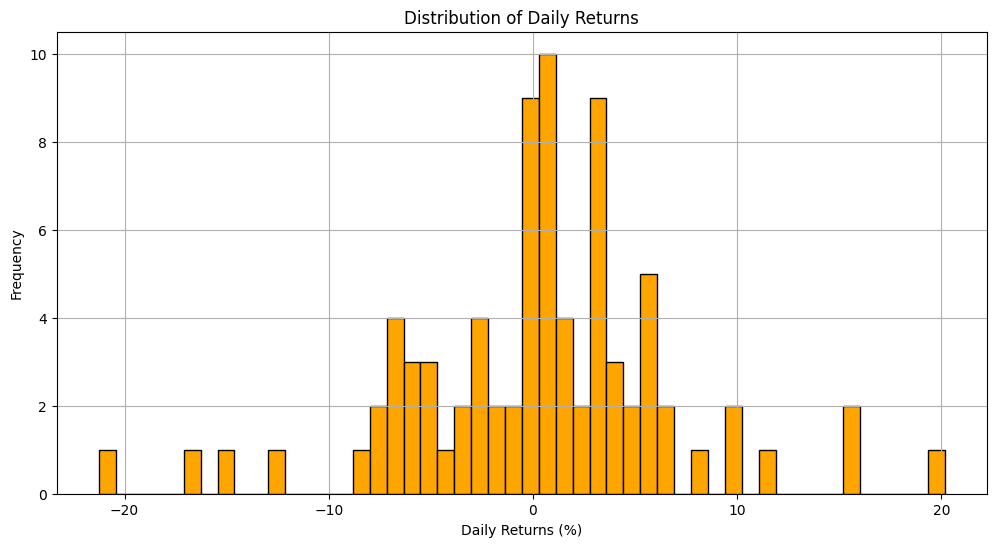

In [5]:
# Volatility Analysis - Daily Returns
daily_data['Daily Returns'] = daily_data['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.hist(daily_data['Daily Returns'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()



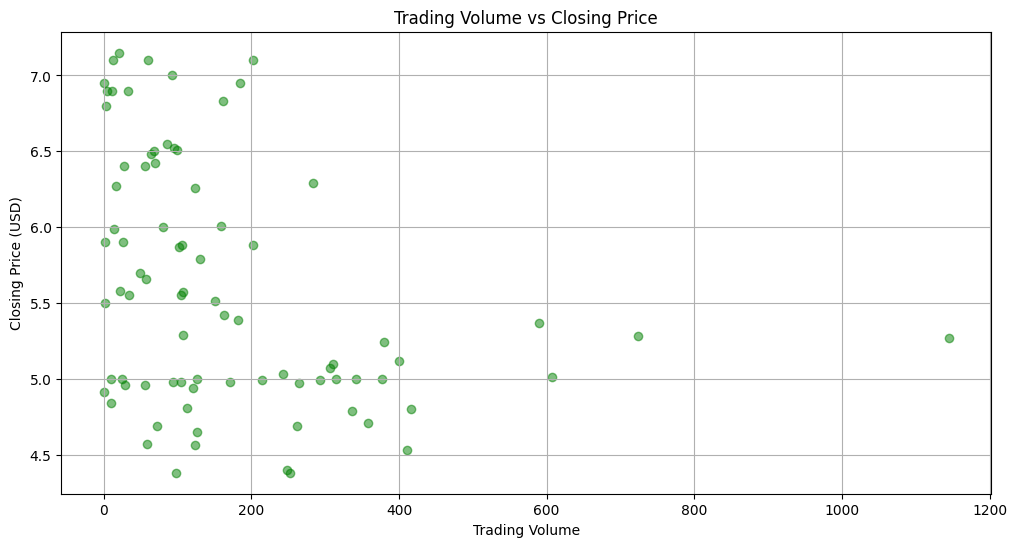

In [6]:
# Volume vs Price - Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['Volume'], daily_data['Close'], alpha=0.5, color='green')
plt.title('Trading Volume vs Closing Price')
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()

In [7]:
# Display the first few rows of the aggregated data
print(daily_data.head())

    Datetime  Open  High   Low  Close      Volume  Daily Returns
0 2012-01-01  4.58  4.84  4.58   4.84   10.000000            NaN
1 2012-01-02  4.84  5.00  4.84   5.00   10.100000       3.305785
2 2012-01-03  5.00  5.32  5.00   5.29  107.085281       5.800000
3 2012-01-04  5.29  5.57  4.93   5.57  107.233260       5.293006
4 2012-01-05  5.57  6.46  5.57   6.42   70.328742      15.260323


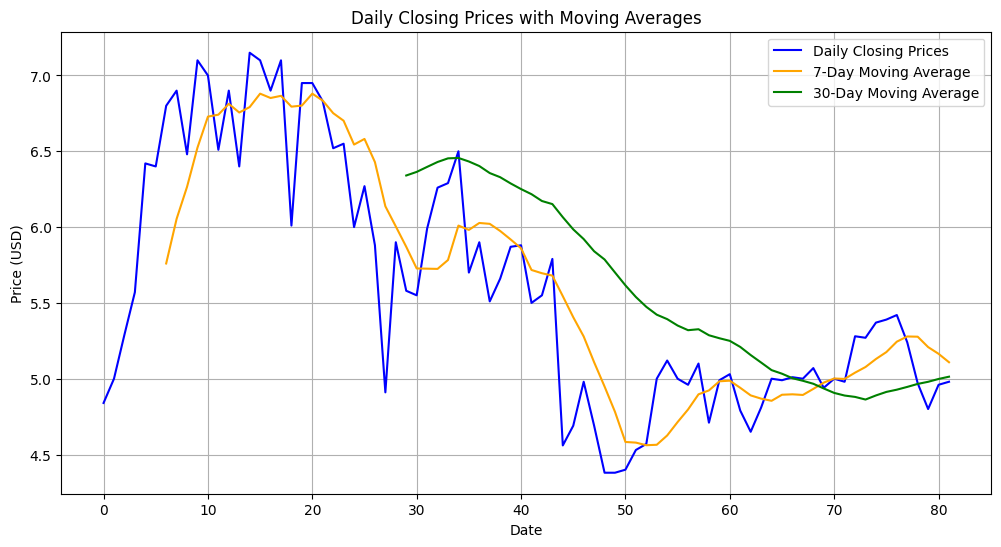

In [8]:
# Step 6: Advanced Visualizations
# Rolling Averages - 7-day and 30-day
daily_data['7-day MA'] = daily_data['Close'].rolling(window=7).mean()
daily_data['30-day MA'] = daily_data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Close'], label='Daily Closing Prices', color='blue')
plt.plot(daily_data.index, daily_data['7-day MA'], label='7-Day Moving Average', color='orange')
plt.plot(daily_data.index, daily_data['30-day MA'], label='30-Day Moving Average', color='green')
plt.title('Daily Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

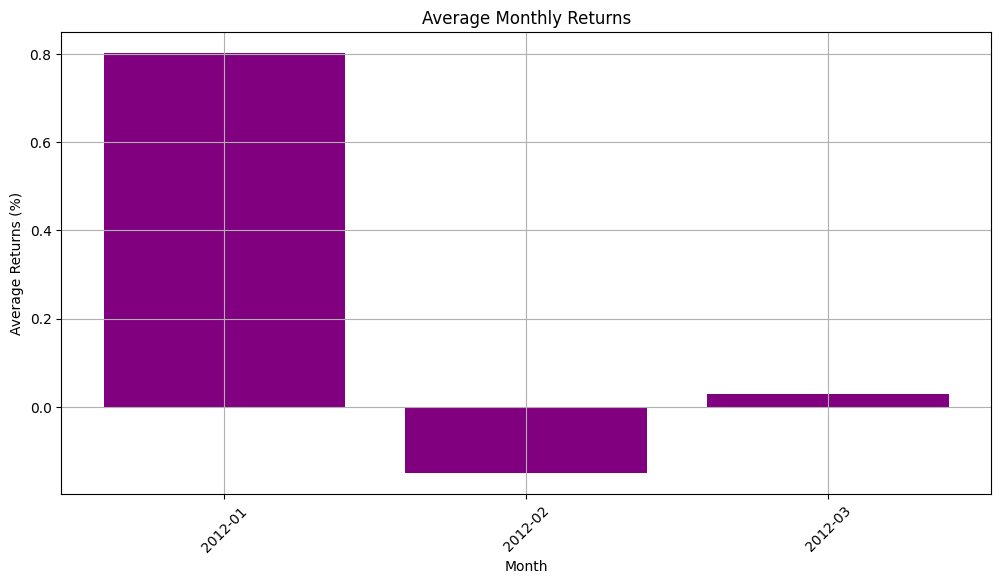

In [9]:
# Heatmap of Monthly Returns
# Convert 'Datetime' column to DatetimeIndex
daily_data['Datetime'] = pd.to_datetime(daily_data['Datetime'])  # Ensure Datetime column is in datetime format
daily_data.set_index('Datetime', inplace=True) # Set 'Datetime' as index
daily_data['Month'] = daily_data.index.to_period('M')  # Now apply to_period on DatetimeIndex
monthly_returns = daily_data.groupby('Month')['Daily Returns'].mean()

# Plotting the Monthly Returns as a Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index.astype(str), monthly_returns.values, color='purple')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Returns (%)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [10]:
# Display the first few rows of the aggregated data
print(daily_data.head())

            Open  High   Low  Close      Volume  Daily Returns  7-day MA  \
Datetime                                                                   
2012-01-01  4.58  4.84  4.58   4.84   10.000000            NaN       NaN   
2012-01-02  4.84  5.00  4.84   5.00   10.100000       3.305785       NaN   
2012-01-03  5.00  5.32  5.00   5.29  107.085281       5.800000       NaN   
2012-01-04  5.29  5.57  4.93   5.57  107.233260       5.293006       NaN   
2012-01-05  5.57  6.46  5.57   6.42   70.328742      15.260323       NaN   

            30-day MA    Month  
Datetime                        
2012-01-01        NaN  2012-01  
2012-01-02        NaN  2012-01  
2012-01-03        NaN  2012-01  
2012-01-04        NaN  2012-01  
2012-01-05        NaN  2012-01  


In [11]:
# Feature Engineering
# Create features for moving averages and momentum
daily_data['10-day MA'] = daily_data['Close'].rolling(window=10).mean()
daily_data['50-day MA'] = daily_data['Close'].rolling(window=50).mean()
daily_data['Momentum'] = daily_data['Close'] - daily_data['Close'].shift(10)

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

daily_data['RSI'] = calculate_rsi(daily_data['Close'], window=14)

In [12]:
# Display the first few rows of the data with new features
print(daily_data.head())


            Open  High   Low  Close      Volume  Daily Returns  7-day MA  \
Datetime                                                                   
2012-01-01  4.58  4.84  4.58   4.84   10.000000            NaN       NaN   
2012-01-02  4.84  5.00  4.84   5.00   10.100000       3.305785       NaN   
2012-01-03  5.00  5.32  5.00   5.29  107.085281       5.800000       NaN   
2012-01-04  5.29  5.57  4.93   5.57  107.233260       5.293006       NaN   
2012-01-05  5.57  6.46  5.57   6.42   70.328742      15.260323       NaN   

            30-day MA    Month  10-day MA  50-day MA  Momentum  RSI  
Datetime                                                             
2012-01-01        NaN  2012-01        NaN        NaN       NaN  NaN  
2012-01-02        NaN  2012-01        NaN        NaN       NaN  NaN  
2012-01-03        NaN  2012-01        NaN        NaN       NaN  NaN  
2012-01-04        NaN  2012-01        NaN        NaN       NaN  NaN  
2012-01-05        NaN  2012-01        NaN      

Correlation Matrix:
                  Close    Volume  Daily Returns  Momentum       RSI
Close          1.000000 -0.348019       0.235494  0.422770  0.371494
Volume        -0.348019  1.000000       0.002736  0.170215  0.188713
Daily Returns  0.235494  0.002736       1.000000  0.262989  0.150134
Momentum       0.422770  0.170215       0.262989  1.000000  0.650953
RSI            0.371494  0.188713       0.150134  0.650953  1.000000
Significant Price Drops:
            Close  Daily Returns
Datetime                        
2012-01-09   6.48      -6.086957
2012-01-12   6.51      -7.000000
2012-01-14   6.40      -7.246377
2012-01-19   6.01     -15.352113
2012-01-25   6.00      -8.396947
2012-01-27   5.88      -6.220096
2012-01-28   4.91     -16.496599
2012-01-30   5.58      -5.423729
2012-02-05   5.70     -12.307692
2012-02-07   5.51      -6.610169
2012-02-11   5.50      -6.462585
2012-02-14   4.56     -21.243523
2012-02-17   4.69      -5.823293
2012-02-18   4.38      -6.609808
2012-02-28   

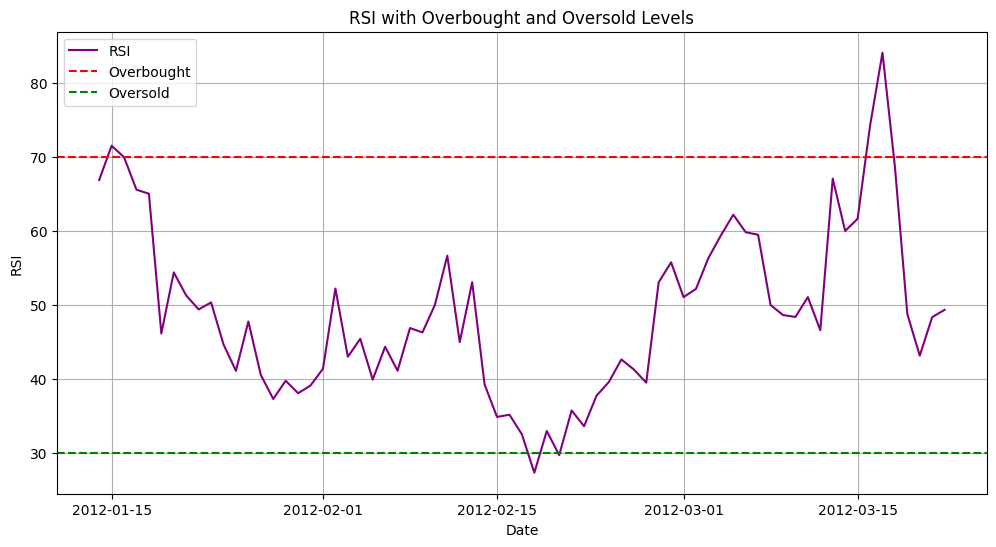

In [13]:
# Advanced Analysis
# Correlation between features
correlation_matrix = daily_data[['Close', 'Volume', 'Daily Returns', 'Momentum', 'RSI']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Event Analysis - Significant Price Drops
daily_data['Price Drop'] = daily_data['Close'].pct_change(periods=1) < -0.05
significant_drops = daily_data[daily_data['Price Drop']]
print("Significant Price Drops:")
print(significant_drops[['Close', 'Daily Returns']])

# Plot RSI with Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title('RSI with Overbought and Oversold Levels')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Display the first few rows of the data with new features
print(daily_data.head())

            Open  High   Low  Close      Volume  Daily Returns  7-day MA  \
Datetime                                                                   
2012-01-01  4.58  4.84  4.58   4.84   10.000000            NaN       NaN   
2012-01-02  4.84  5.00  4.84   5.00   10.100000       3.305785       NaN   
2012-01-03  5.00  5.32  5.00   5.29  107.085281       5.800000       NaN   
2012-01-04  5.29  5.57  4.93   5.57  107.233260       5.293006       NaN   
2012-01-05  5.57  6.46  5.57   6.42   70.328742      15.260323       NaN   

            30-day MA    Month  10-day MA  50-day MA  Momentum  RSI  \
Datetime                                                              
2012-01-01        NaN  2012-01        NaN        NaN       NaN  NaN   
2012-01-02        NaN  2012-01        NaN        NaN       NaN  NaN   
2012-01-03        NaN  2012-01        NaN        NaN       NaN  NaN   
2012-01-04        NaN  2012-01        NaN        NaN       NaN  NaN   
2012-01-05        NaN  2012-01        NaN